<a href="https://colab.research.google.com/github/pierrelux/vfpolytope/blob/master/polytope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
def mdp_fig2d():
  """ Figure 2 d) of 
  ''The Value Function Polytope in Reinforcement Learning''
  by Dadashi et al. (2019) https://arxiv.org/abs/1901.11524
  """
  P = np.array([[[0.7 , 0.3 ], [0.2 , 0.8 ]],
              [[0.99, 0.01], [0.99, 0.01]]])
  R = np.array(([[-0.45, -0.1 ],
               [ 0.5 ,  0.5 ]]))
  return P, R, 0.9

def solve_mdp(P, R, gamma, policies):
  ppi = np.einsum('kij,lik->lij', P, policies)
  rpi = np.einsum('ij,kij->ki', R, policies)
  return np.linalg.solve(np.eye(R.shape[0]) - gamma*ppi, rpi)

def sample_random_policies(npolicies=1000):
  nstates, nactions = 2,2
  random_policies = np.zeros((npolicies, nstates, nactions))
  random_policies[:,:,0] =  np.random.uniform(size=(npolicies, nstates))
  random_policies[:,:,1] = 1 - random_policies[:,:,0]
  return random_policies

In [0]:
P, R, gamma = mdp_fig2d()
random_policies = sample_random_policies()
vfs = solve_mdp(P, R, gamma, random_policies)

In [0]:
from itertools import product
nstates, nactions = P.shape[0], P.shape[1]
all_action_choices = np.array(list(product(range(nactions), repeat=nstates)))
deterministic_policies = np.eye(nactions)[all_action_choices]
dvfs = solve_mdp(P, R, gamma, deterministic_policies)

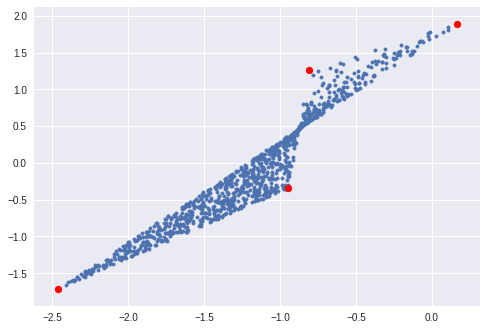

In [5]:
plt.scatter(vfs[:,0],vfs[:,1],s=12)
plt.scatter(dvfs[:,0],dvfs[:,1],c='r')